Test Set Mean Absolute Error: 0.17006540365507838

Test Set Mean Squared Error: 0.06270585284048219

**Test Set R-squared Score: 0.9396452953150899 best till now**

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

R-squared Score for Best Model: 0.9343906107512074

Mean Absolute Error for Best Model: 0.17073627855142176

Mean Squared Error for Best Model: 0.0625066438658504

In [10]:
import pandas as pd
data = pd.read_excel('DATASET.xlsx', sheet_name='MergedSheet2')
dataset = data.drop(['Note','Extension','CSD','Metal Type'], axis=1)
dataset.head()

,Density (g/cm3),PLD,LCD,VSA (m2/cm3),GSA (m2/g),void fraction,pore volume (cm3/g),1bar_280Kelvin,5.8bar_280Kelvin,65bar_280Kelvin,1bar_298Kelvin,5.8bar_298Kelvin,65bar_298Kelvin
0,1.52493,2.49720,4.45543,0.000,0.000,0.234030,0.255564,54.240850,56.028176,56.367142,51.440008,55.532628,56.302852
1,1.56594,2.44162,3.53642,0.000,0.000,0.172707,0.239596,6.818622,27.730762,74.332208,4.103456,18.817763,63.357725
2,1.15199,6.80253,11.25251,1185.300,1028.920,0.686068,0.556041,49.042482,130.543837,215.759616,34.091603,107.157157,201.699269
3,1.76082,4.14331,4.82084,646.239,367.010,0.349898,0.277374,29.566907,69.488797,109.056896,20.013711,57.182962,102.016284
4,1.78760,4.08045,4.80529,591.710,331.008,0.344895,0.270205,29.361130,68.306263,108.213874,19.709838,56.587642,101.295489


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
# Assuming X and y are your feature and target variables respectively
# Replace X and y with your actual data

X = dataset.drop(['1bar_298Kelvin', '5.8bar_298Kelvin', '65bar_298Kelvin', '1bar_280Kelvin', '5.8bar_280Kelvin', '65bar_280Kelvin'], axis=1)
y = dataset[['65bar_298Kelvin']]

# Initialize the scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale the features and target
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=19)

# Further split the training data into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rfr = RandomForestRegressor(random_state=13)

# Fit the model to the training data
rfr.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rfr.predict(X_val)

# Evaluate the model on the validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print validation set evaluation metrics
print("Validation Set Mean Absolute Error:", val_mae)
print("Validation Set Mean Squared Error:", val_mse)
print("Validation Set R-squared Score:", val_r2)

# Make predictions on the test set
y_test_pred = rfr.predict(X_test)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print test set evaluation metrics
print("\nTest Set Mean Absolute Error:", test_mae)
print("Test Set Mean Squared Error:", test_mse)
print("Test Set R-squared Score:", test_r2)


/Users/avani/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
<ipython-input-2-d84fac184651>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


Validation Set Mean Absolute Error: 0.1795708921195287
Validation Set Mean Squared Error: 0.0707324865202346
Validation Set R-squared Score: 0.927621309523672

Test Set Mean Absolute Error: 0.17006540365507838
Test Set Mean Squared Error: 0.06270585284048219
Test Set R-squared Score: 0.9396452953150899


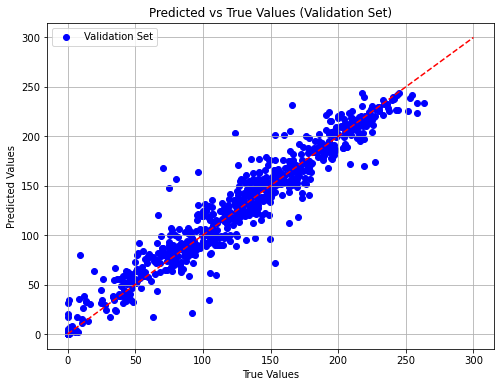

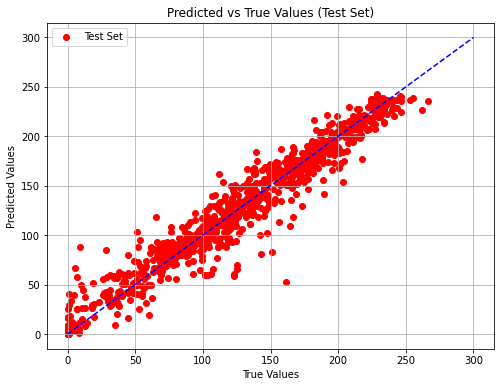

In [4]:
import matplotlib.pyplot as plt

# Inverse transform scaled predictions and true values to original scale
y_val_pred_inv = scaler_y.inverse_transform(y_val_pred)
y_val_inv = scaler_y.inverse_transform(y_val)

y_test_pred_inv = scaler_y.inverse_transform(y_test_pred)
y_test_inv = scaler_y.inverse_transform(y_test)

# Plot predicted vs true values for validation set
plt.figure(figsize=(8, 6))
plt.scatter(y_val_inv, y_val_pred_inv, color='blue', label='Validation Set')
plt.plot([0, 300], [0, 300], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values (Validation Set)')
plt.legend()
plt.grid(True)
plt.show()

# Plot predicted vs true values for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test_inv, y_test_pred_inv, color='red', label='Test Set')
plt.plot([0, 300], [0, 300], color='blue', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = dataset.drop(['1bar_298Kelvin', '5.8bar_298Kelvin', '65bar_298Kelvin', '1bar_280Kelvin', '5.8bar_280Kelvin', '65bar_280Kelvin'], axis=1)
y = dataset[['65bar_298Kelvin']]

# Initialize the scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale the features and target
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=19)

# Further split the training data into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define your RandomForestRegressor and param_grid
rfr = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='r2', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the results
cv_results = grid_search.cv_results_

# Extract best parameters
best_params = grid_search.best_params_

# Get the index of the best model
best_index = grid_search.best_index_

# Extract parameters and scores for each model
parameters_list = grid_search.cv_results_['params']
r2_scores_list = grid_search.cv_results_['mean_test_score']

# Initialize lists for storing MAE and MSE scores
mae_scores_list = []
mse_scores_list = []

# Calculate MAE and MSE for each model
for params in parameters_list:
    # Initialize RandomForestRegressor with specific parameters
    rfr = RandomForestRegressor(**params)
    # Fit the model
    rfr.fit(X_train, y_train)
    # Predict using the model
    y_val_pred = rfr.predict(X_val)
    y_pred = rfr.predict(X_test)
    # Calculate MAE and MSE
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    # Append scores to respective lists
    mae_scores_list.append(mae)
    mse_scores_list.append(mse)

# Output parameters and scores for each model
for parameters, r2_score, mae_score, mse_score in zip(parameters_list, r2_scores_list, mae_scores_list, mse_scores_list):
    print("Parameters:", parameters)
    print("R-squared Score:", r2_score)
    print("Mean Absolute Error:", mae_score)
    print("Mean Squared Error:", mse_score)
    print()

# Output best parameters and scores
print("Best Parameters:", best_params)
print("R-squared Score for Best Model:", r2_scores_list[best_index])
print("Mean Absolute Error for Best Model:", mae_scores_list[best_index])
print("Mean Squared Error for Best Model:", mse_scores_list[best_index])


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Users/avani/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
<ipython-input-12-6cd9b3bc1a31>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-12-6cd9b3bc1a31>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-12-6cd9b3bc1a31>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-12-6cd9b3bc1a31>:61: DataConver

<ipython-input-12-6cd9b3bc1a31>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-12-6cd9b3bc1a31>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-12-6cd9b3bc1a31>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-12-6cd9b3bc1a31>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-12-6cd9b3bc1a31>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

<ipython-input-12-6cd9b3bc1a31>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-12-6cd9b3bc1a31>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-12-6cd9b3bc1a31>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-12-6cd9b3bc1a31>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-12-6cd9b3bc1a31>:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
R-squared Score: 0.9322952305958845
Mean Absolute Error: 0.16986592179341378
Mean Squared Error: 0.06332914721887377

Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R-squared Score: 0.93405318429215
Mean Absolute Error: 0.16932510925462219
Mean Squared Error: 0.06162493402720844

Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R-squared Score: 0.9338620229364274
Mean Absolute Error: 0.16973049772460028
Mean Squared Error: 0.06247647000461637

Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
R-squared Score: 0.9330638401687301
Mean Absolute Error: 0.17242198474017953
Mean Squared Error: 0.06426463780461122

Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
R-squared Score: 0.9328853971154

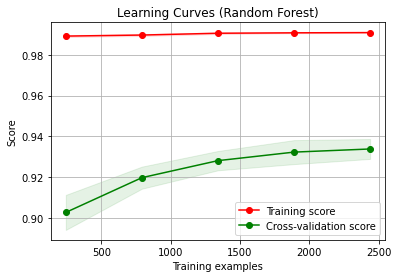

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Load your dataset
data = pd.read_excel('DATASET.xlsx', sheet_name='MergedSheet2')
dataset = data.drop(['Note','Extension','CSD','Metal Type'], axis=1)

# Define your features (X) and target variable (y)
X = dataset.drop(['1bar_298Kelvin', '5.8bar_298Kelvin', '65bar_298Kelvin', '1bar_280Kelvin', '5.8bar_280Kelvin', '65bar_280Kelvin'], axis=1)
y = dataset[['65bar_298Kelvin']]

# Initialize the scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale the features and target
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=19)

# Further split the training data into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the title for the learning curve plot
title = "Learning Curves (Random Forest)"

# Initialize the Random Forest Regressor
rfr = RandomForestRegressor(random_state=13)

# Plot the learning curve
plot_learning_curve(rfr, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()


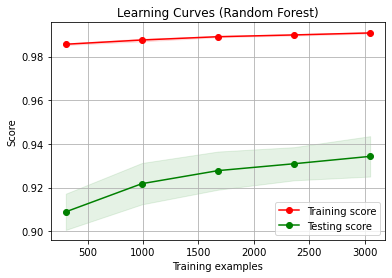

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

def plot_learning_curve(estimator, title, X_train, y_train, X_test, y_test, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the training and testing learning curve.
    """
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Testing score")

    plt.legend(loc="best")
    return plt

# Load your dataset
data = pd.read_excel('DATASET.xlsx', sheet_name='MergedSheet2')
dataset = data.drop(['Note','Extension','CSD','Metal Type'], axis=1)

# Define your features (X) and target variable (y)
X = dataset.drop(['1bar_298Kelvin', '5.8bar_298Kelvin', '65bar_298Kelvin', '1bar_280Kelvin', '5.8bar_280Kelvin', '65bar_280Kelvin'], axis=1)
y = dataset[['65bar_298Kelvin']]

# Initialize the scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale the features and target
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=19)

# Define the title for the learning curve plot
title = "Learning Curves (Random Forest)"

# Initialize the Random Forest Regressor
rfr = RandomForestRegressor(random_state=13)

# Plot the learning curve
plot_learning_curve(rfr, title, X_train, y_train, X_test, y_test, cv=None, n_jobs=-1)
plt.show()
